In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
import pygeos
import rtree
from time import sleep
import requests
from fiona import BytesCollection  


/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


# Creating a Plannungsraeume GeoDataframe

In [5]:
pr = gp.read_file('../data/Maps/Berlin_Planungsräume_25833.shp')

**Variables description**

spatial_na = ID of the Plannungsraum

PLRNAME Name of the Paannungsraum 

Geometry = location of the Plannungsraum


In [32]:
pr.head()

OBJECTID spatial_na                spatial_al spatial_ty  \
0         1   01011101              Stülerstraße    Polygon   
1         2   01011102         Großer Tiergarten    Polygon   
2         3   01011103              Lützowstraße    Polygon   
3         4   01011104              Körnerstraße    Polygon   
4         5   01011105  Nördlicher Landwehrkanal    Polygon   

                    PLRNAME BEZNAME                DATUM    Shape__Are  \
0              Stülerstraße   Mitte  2006-06-14T00:00:00  9.888231e+05   
1         Großer Tiergarten   Mitte  2006-06-14T00:00:00  8.115685e+06   
2              Lützowstraße   Mitte  2006-06-14T00:00:00  1.408009e+06   
3              Körnerstraße   Mitte  2006-06-14T00:00:00  9.119500e+05   
4  Nördlicher Landwehrkanal   Mitte  2006-06-14T00:00:00  2.519593e+06   

     Shape__Len Plr_Nummer                  Plr_Name  plrnummer  \
0   5535.908680   01011101              Stülerstraße  1011101.0   
1  17021.974583   01011102         Großer Tiergarten  1011102.0   
2   5328.004505   01011103              Lützowstraße  1011103.0   
3   3858.829286   01011104              Körnerstraße  1011104.0   
4   8430.061607   01011105  Nördlicher Landwehrkanal  1011105.0   

                                            geometry  
0  POLYGON ((387256.566 5818552.267, 387323.142 5...  
1  POLYGON ((386767.495 5819393.112, 386768.323 5...  
2  POLYGON ((387952.632 5818274.543, 387986.668 5...  
3  POLYGON ((388847.061 5817874.656, 388855.531 5...  
4  POLYGON ((388129.510 5819015.126, 388157.136 5...

<AxesSubplot:>

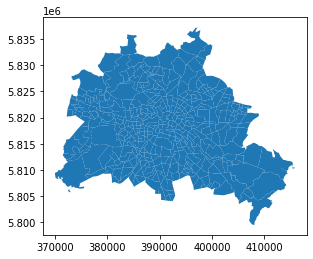

In [7]:
pr.plot()

Housing Data Set description --> on Progroseraum (bigger than Plannungsraum)

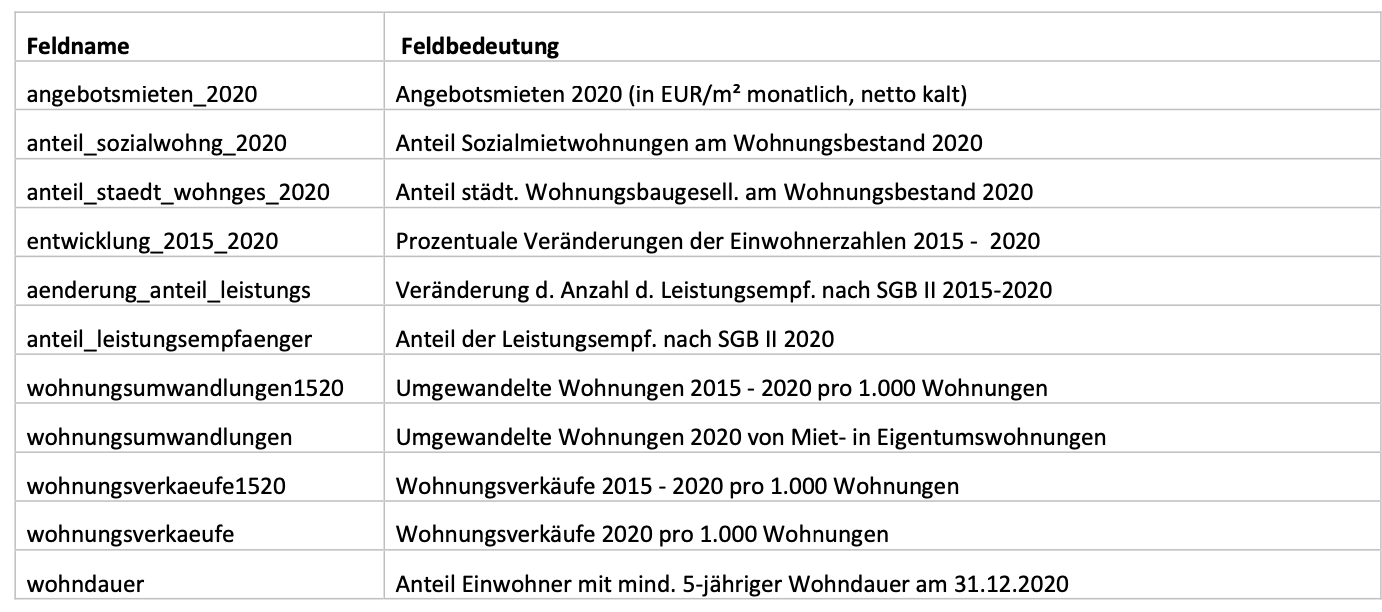

In [30]:
housing_data

schluessel                  prognosera angebotsmi aenderung_ anteil_lei  \
0        0101                     Zentrum      16.17      -1.26       8.13   
1        0102                      Moabit      14.53      -4.96      16.13   
2        0103               Gesundbrunnen      10.24      -5.19      30.60   
3        0104                     Wedding       9.60      -5.22      23.97   
4        0201              Kreuzberg-Nord      13.35      -7.40      31.19   
5        0202               Kreuzberg Süd      14.41      -3.34      12.55   
6        0203               Kreuzberg Ost      12.69      -5.01      19.38   
7        0204         Friedrichshain West      14.63      -1.07      11.32   
8        0205          Friedrichshain Ost      13.97      -2.04      10.25   
9        0301                        Buch       8.65      -2.53      15.06   
10       0302           Nördliches Pankow      10.76      -1.14       5.35   
11       0303        Nördliches Weißensee       9.21       0.45       6.55   
12       0304            Südliches Pankow      10.51      -2.20       6.89   
13       0305         Südliches Weißensee      10.29      -3.00       9.29   
14       0306  Nördlicher Prenzlauer Berg      10.49      -1.53       8.86   
15       0307   Südlicher Prenzlauer Berg      11.26      -1.41       6.28   
16       0401                        CW 1       7.45      -4.10      22.09   
17       0402                        CW 2      10.64       0.07       5.67   
18       0403                        CW 3      13.07      -2.73       9.17   
19       0404                        CW 4      12.38      -0.41       5.88   
20       0405                        CW 5      12.90      -1.62       7.87   
21       0406                        CW 6       0.00       0.00       0.00   
22       0501                       SPA 1       7.99      -3.32      19.27   
23       0502                       SPA 2       8.82      -1.94      18.75   
24       0503                       SPA 3       8.33      -3.37      18.22   
25       0504                       SPA 4       9.89      -0.51       2.49   
26       0601                    Region A      10.80      -2.74       6.85   
27       0602                    Region B       9.29      -2.08       8.61   
28       0603                    Region C      10.84      -0.36       5.03   
29       0604                    Region D      11.45      -0.13       2.46   
30       0701             Schöneberg-Nord      11.21      -2.65      15.34   
31       0702              Schöneberg Süd      13.99      -2.50      11.59   
32       0703                   Friedenau      11.29      -2.05       7.44   
33       0704                   Tempelhof      10.47      -3.38      14.21   
34       0705                  Mariendorf       8.30      -1.31      13.28   
35       0706                 Marienfelde       8.10      -1.23      17.26   
36       0707                 Lichtenrade       8.34      -0.24      11.95   
37       0801                    Neukölln      11.52      -6.19      24.80   
38       0802                Britz/Buckow       8.67      -1.48      16.61   
39       0803                Gropiusstadt       8.22      -3.21      22.48   
40       0804           Buckow Nord/Rudow       7.90       0.25       9.15   
41       0901          Treptow-Köpenick 1      10.72      -1.64       9.45   
42       0902          Treptow-Köpenick 2      10.22      -1.64      14.55   
43       0903          Treptow-Köpenick 3      11.56       0.34       9.24   
44       0904          Treptow-Köpenick 4       8.47      -0.95       7.65   
45       0905          Treptow-Köpenick 5      10.57      -0.50       5.49   
46       1001                     Marzahn       7.21      -6.48      16.51   
47       1002                 Hellersdorf       8.62      -6.08      20.31   
48       1003                    Biesdorf       9.55      -0.26       4.23   
49       1004         Kaulsdorf/Mahlsdorf       9.71      -1.00       2.50   
50       1101       Hohen

In [14]:
housing_data = gp.read_file('../data/Maps/housing_data.shp')

schluessel = ID of the Prognoseraum

In [28]:
housing_data.head()

schluessel      prognosera angebotsmi aenderung_ anteil_lei anteil_soz  \
0       0101         Zentrum      16.17      -1.26       8.13       1.84   
1       0102          Moabit      14.53      -4.96      16.13       6.69   
2       0103   Gesundbrunnen      10.24      -5.19      30.60      23.13   
3       0104         Wedding       9.60      -5.22      23.97       5.88   
4       0201  Kreuzberg-Nord      13.35      -7.40      31.19      26.09   

  anteil_sta entwicklun wohndauer wohnungsum wohnungs_1 wohnungsve wohnungs_2  \
0      16.66      11.30     56.71      15.39      78.40       7.71      48.92   
1       4.41       6.07     59.13      11.91      87.17       8.43      52.36   
2      19.77       2.86     63.97       6.37      43.92       3.28      25.25   
3      15.24       1.08     61.66      10.38      68.97       5.29      43.52   
4      28.67       0.90     68.51       4.99      61.13       1.39      18.20   

                                            geometry  
0  POLYGON ((389165.070 5821874.114, 389207.883 5...  
1  POLYGON ((389165.070 5821874.114, 389321.893 5...  
2  POLYGON ((391337.962 5824343.426, 391339.511 5...  
3  POLYGON ((388630.774 5822231.745, 388432.087 5...  
4  POLYGON ((392753.849 5817395.996, 392725.022 5...

# Loading demographic data

In [89]:
mig_data = pd.read_csv('../data/EWRMIGRA202012E_Matrix.csv', sep=';')
gen_data = pd.read_csv('../data/EWR202012E_Matrix.csv', sep=';')


In [91]:
mig_data.sample(n=5)

ZEIT   RAUMID  BEZ  PGR  BZR  PLR  STADTRAUM  MH_E  MH_EM  MH_EW  ...  \
69   202012  3010104    3    1    1    4          2    55     36     19  ...   
245  202012  7010102    7    1    1    2          1  9340   4910   4430  ...   
118  202012  4020312    4    2    3   12          2  1885    982    903  ...   
106  202012  3071639    3    7   16   39          1  3635   1791   1844  ...   
260  202012  7040406    7    4    4    6          2  2275   1231   1044  ...   

     MH_E95_110  MH_U1  MH_1U6  MH_6U15  MH_15U18  MH_18U25  MH_25U55  \
69            0      3       3        6         4         6        33   
245           9     77     569      915       305       737      4604   
118           0     25     111      224        72       154       914   
106           3     34     309      428       121       214      2214   
260           0     46     200      229        42       143      1304   

     MH_55U65  MH_65U80  MH_80U110  
69          0         0          0  
245      1038       852        243  
118       174       167         44  
106       187        92         36  
260       181       115         15  

[5 rows x 51 columns]

In [90]:
gen_data.sample(n=5)

ZEIT   RAUMID  BEZ  PGR  BZR  PLR  STADTRAUM    E_E  E_EM  E_EW  ...  \
247  202012  7010104    7    1    1    4          1  13480  6989  6491  ...   
327  202012  9020502    9    2    5    2          2  16103  8113  7990  ...   
314  202012  8041037    8    4   10   37          2   9997  4942  5055  ...   
303  202012  8020726    8    2    7   26          2   8320  4036  4284  ...   
31   202012  1033102    1    3   31    2          1  11665  6040  5625  ...   

     E_E95_110  E_EU1  E_E1U6  E_E6U15  E_E15U18  E_E18U25  E_E25U55  \
247         23    125     632     1006       330       997      6612   
327         20    173     997     1189       315      1597      7976   
314          9     75     496      738       252       684      3420   
303         16     68     396      562       183       526      3062   
31           6     98     633     1013       322      1189      6027   

     E_E55U65  E_E65U80  E_E80U110  
247      1925      1453        400  
327      1730      1252        874  
314      1599      1909        824  
303      1335      1544        644  
31       1151       940        292  

[5 rows x 51 columns]

In [ ]:
pr2021 = 

In [5]:
social_index_2021_pr2021 = pd.read_csv('/Users/Safia/code/Safiaaaaa/school-map-project/data/Social_Index_2021.csv', sep=';')

In [18]:
social_index_2021_pr2021.columns

Index(['PLR_ID', 'Name', 'EW', 'ant_arbeitslose', 'ant_transfer',
       'Kinderarmut', 'ant_arbeitslose_dyn', 'ant_transfer_dyn',
       'Kinderarmut_dyn'],
      dtype='object')

# Loading more maps and features

## Land use

In [101]:
land_use = gp.read_file('../data/Maps/nutzung.shp')

In [94]:
land_use.sample(n=5)

schl5 bez                bezirk   woz  \
9444   1100566071000000  07  Tempelhof-Schöneberg  10.0   
24198  2101870201000000  10   Marzahn-Hellersdorf  10.0   
17650  1701451801000100  11           Lichtenberg  50.0   
9284   1100541711000000  07  Tempelhof-Schöneberg  10.0   
5067   0800330131000000  05               Spandau  50.0   

                               woz_name  grz grz_name  ststrnr  \
9444                        Wohnnutzung  NaN     None      1.0   
24198                       Wohnnutzung  NaN     None     10.0   
17650  Gemeinbedarfs- und Sondernutzung  NaN     None     17.0   
9284                        Wohnnutzung  NaN     None      5.0   
5067   Gemeinbedarfs- und Sondernutzung  NaN     None     17.0   

                                               ststrname   typ  \
9444   Blockbebauung der Gründerzeit mit Seitenflügel...   2.0   
24198                   Niedrige Bebauung mit Hausgärten  23.0   
17650  Bebauung mit überwiegender Nutzung durch Gemei...  13.0   
9284               Zeilenbebauung seit den 1950er Jahren  11.0   
5067   Bebauung mit überwiegender Nutzung durch Gemei...  45.0   

                                                 typklar  nutz  \
9444   Geschlossene Blockbebauung, Hinterhof (1870er ...  10.0   
24198          Freistehende Einfamilienhäuser mit Gärten  10.0   
17650                  Neubau-Schule (Baujahr nach 1945)  50.0   
9284   Freie Zeilenbebauung mit landschaftlichem Sied...  10.0   
5067                                              Kultur  50.0   

                                nutzung  nutz_bauvo  \
9444                        Wohnnutzung        10.0   
24198                       Wohnnutzung        10.0   
17650  Gemeinbedarfs- und Sondernutzung        50.0   
9284                        Wohnnutzung        10.0   
5067   Gemeinbedarfs- und Sondernutzung        50.0   

                             nutzung_ba        flalle  \
9444                        Wohnnutzung   3866.034616   
24198                       Wohnnutzung  38120.426028   
17650  Gemeinbedarfs- und Sondernutzung  28343.120997   
9284                        Wohnnutzung   7509.081642   
5067   Gemeinbedarfs- und Sondernutzung  67077.862438   

                                                geometry  
9444   POLYGON ((387393.060 5817903.964, 387408.295 5...  
24198  POLYGON ((401429.718 5818701.051, 401460.522 5...  
17650  POLYGON ((400619.702 5816682.596, 400626.938 5...  
9284   POLYGON ((387179.031 5816168.519, 387254.194 5...  
5067   POLYGON ((378823.768 5822857.846, 378926.266 5...

<AxesSubplot:>

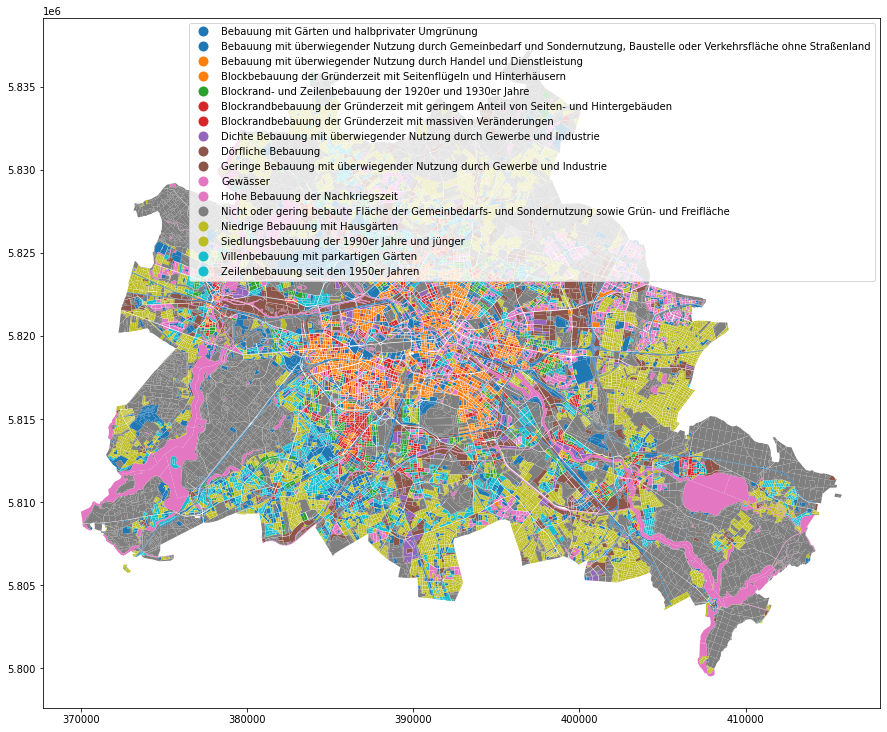

In [102]:
land_use.plot(column='ststrname', figsize=[15,15], legend=True)

## Building age

In [63]:
building_age = gp.read_file('../data/Maps/building_age.shp')

In [87]:
building_age.sample(n=5)

ueberw_dek  freistehen  doppelhaus  gereihtes  anderertyp  x_bis_1900  \
7736   1921-1930         NaN         NaN       12.0         NaN         NaN   
7550   1991-2000        14.0         NaN        NaN         1.0         NaN   
795    2001-2010         2.0         NaN       26.0         2.0         6.0   
8323   1921-1930        25.0         NaN        NaN         NaN         2.0   
12581  1991-2000        28.0         1.0        1.0         NaN         NaN   

       x1901_1910  x1911_1920  x1921_1930  x1931_1940  ...  x1961_1970  \
7736          NaN         NaN        12.0         NaN  ...         NaN   
7550          NaN         NaN         2.0         2.0  ...         NaN   
795           5.0         8.0         1.0         NaN  ...         NaN   
8323          NaN         3.0        11.0         2.0  ...         1.0   
12581         NaN         NaN         1.0         7.0  ...         NaN   

       x1971_1980  x1981_1990  x1991_2000  x2001_2010  x2011_2015  ew2015  \
7736          NaN         NaN         NaN         NaN        None   130.0   
7550          1.0         1.0         5.0         2.0       1 - 3    43.0   
795           NaN         NaN         NaN         9.0        None   678.0   
8323          3.0         NaN         3.0         NaN        None    66.0   
12581         1.0         1.0        10.0         7.0        None    66.0   

        typ                                            typklar  \
7736   72.0  Parallele Zeilenbebauung mit architektonischem...   
7550   23.0          Freistehende Einfamilienhäuser mit Garten   
795     2.0  Geschlossene Blockbebauung, Hinterhof (1870er-...   
8323   24.0  Villen und Stadtvillen mit parkartigem Garten ...   
12581  23.0          Freistehende Einfamilienhäuser mit Garten   

                                                geometry  
7736   POLYGON ((403806.939 5812887.880, 403918.475 5...  
7550   POLYGON ((403354.954 5806380.611, 403356.027 5...  
795    POLYGON ((393845.799 5821765.516, 393847.030 5...  
8323   POLYGON ((412595.576 5810428.338, 412678.398 5...  
12581  POLYGON ((405084.191 5816176.669, 405137.185 5...  

[5 rows x 22 columns]

<AxesSubplot:>

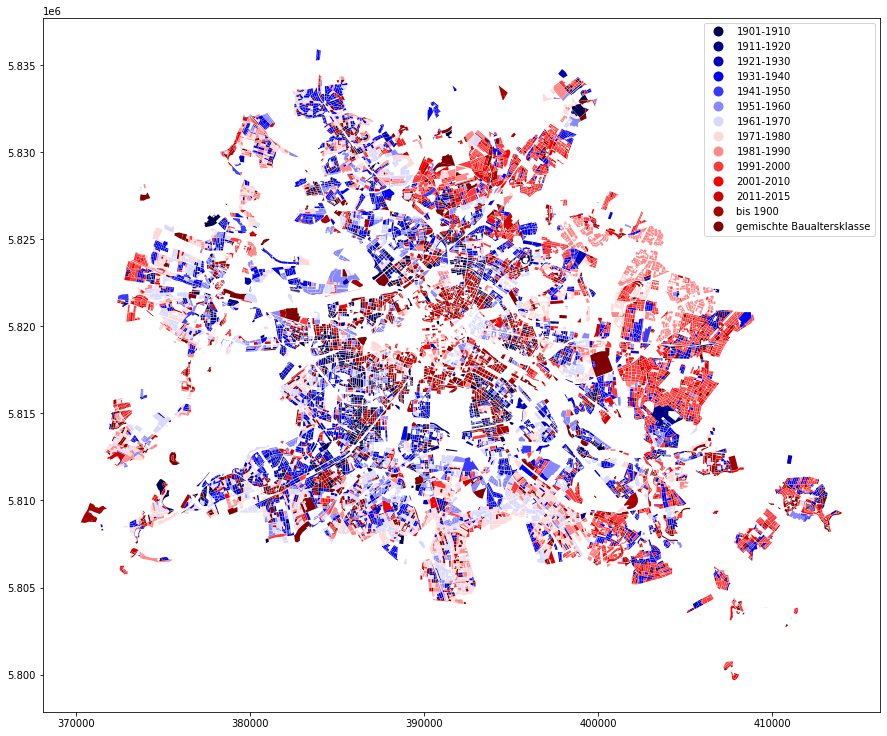

In [85]:
building_age.plot(column='ueberw_dek', figsize= [15,15], cmap = 'seismic', legend=True)

<AxesSubplot:>

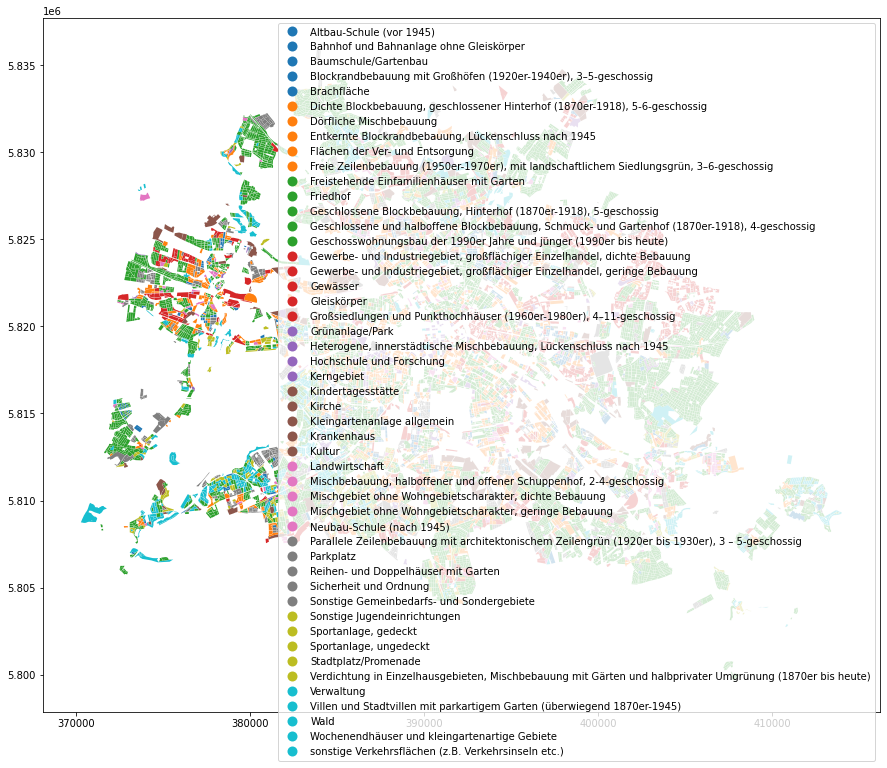

In [104]:
building_age.plot(column='typklar', figsize=[15,15], legend=True)

## Free areas 

This map shows the actual green areas and the evolution of their use for other purposes since 1945. 

In [75]:
free_spaces = gp.read_file('../data/Maps/frfl.shp')

In [76]:
free_spaces.head()

schluessel                          woz_klar grz_klar  \
0  1000536281000000                       Wohnnutzung     None   
1  0700221581000100                      Mischnutzung     None   
2  0700221391000100                       Wohnnutzung     None   
3  0700221401000000                      Mischnutzung     None   
4  0700221581000200  Gemeinbedarfs- und Sondernutzung     None   

                                            typ_klar  verlust_19  verlust__1  \
0          Freistehende Einfamilienhäuser mit Gärten         NaN         NaN   
1  Entkernte Blockrandbebauung, Lückenschluss nac...         NaN         NaN   
2  Entkernte Blockrandbebauung, Lückenschluss nac...         NaN         NaN   
3  Entkernte Blockrandbebauung, Lückenschluss nac...         NaN         NaN   
4                  Neubau-Schule (Baujahr nach 1945)         NaN         NaN   

   verlust__2  verlust__3  verlust_20  verlust__4  gewinn_195      flinhalt  \
0         NaN         NaN         NaN         NaN         NaN  53740.861351   
1         NaN         NaN         NaN         NaN         NaN  25316.077181   
2         NaN         NaN         NaN         NaN         NaN  24655.471374   
3         NaN         NaN         NaN         NaN         NaN  40647.210688   
4         NaN         NaN         NaN         NaN         NaN  15605.342714   

                                            geometry  
0  POLYGON ((372693.846 5805862.199, 372767.073 5...  
1  POLYGON ((385489.155 5819470.840, 385468.992 5...  
2  POLYGON ((385112.720 5819899.851, 385118.236 5...  
3  POLYGON ((385357.423 5819763.011, 385538.289 5...  
4  POLYGON ((385480.540 5819348.312, 385478.583 5...

In [96]:
free_spaces.columns

Index(['schluessel', 'woz_klar', 'grz_klar', 'typ_klar', 'verlust_19',
       'verlust__1', 'verlust__2', 'verlust__3', 'verlust_20', 'verlust__4',
       'gewinn_195', 'flinhalt', 'geometry'],
      dtype='object')

A lot of green areas in East Berlin got converted in the 80's 

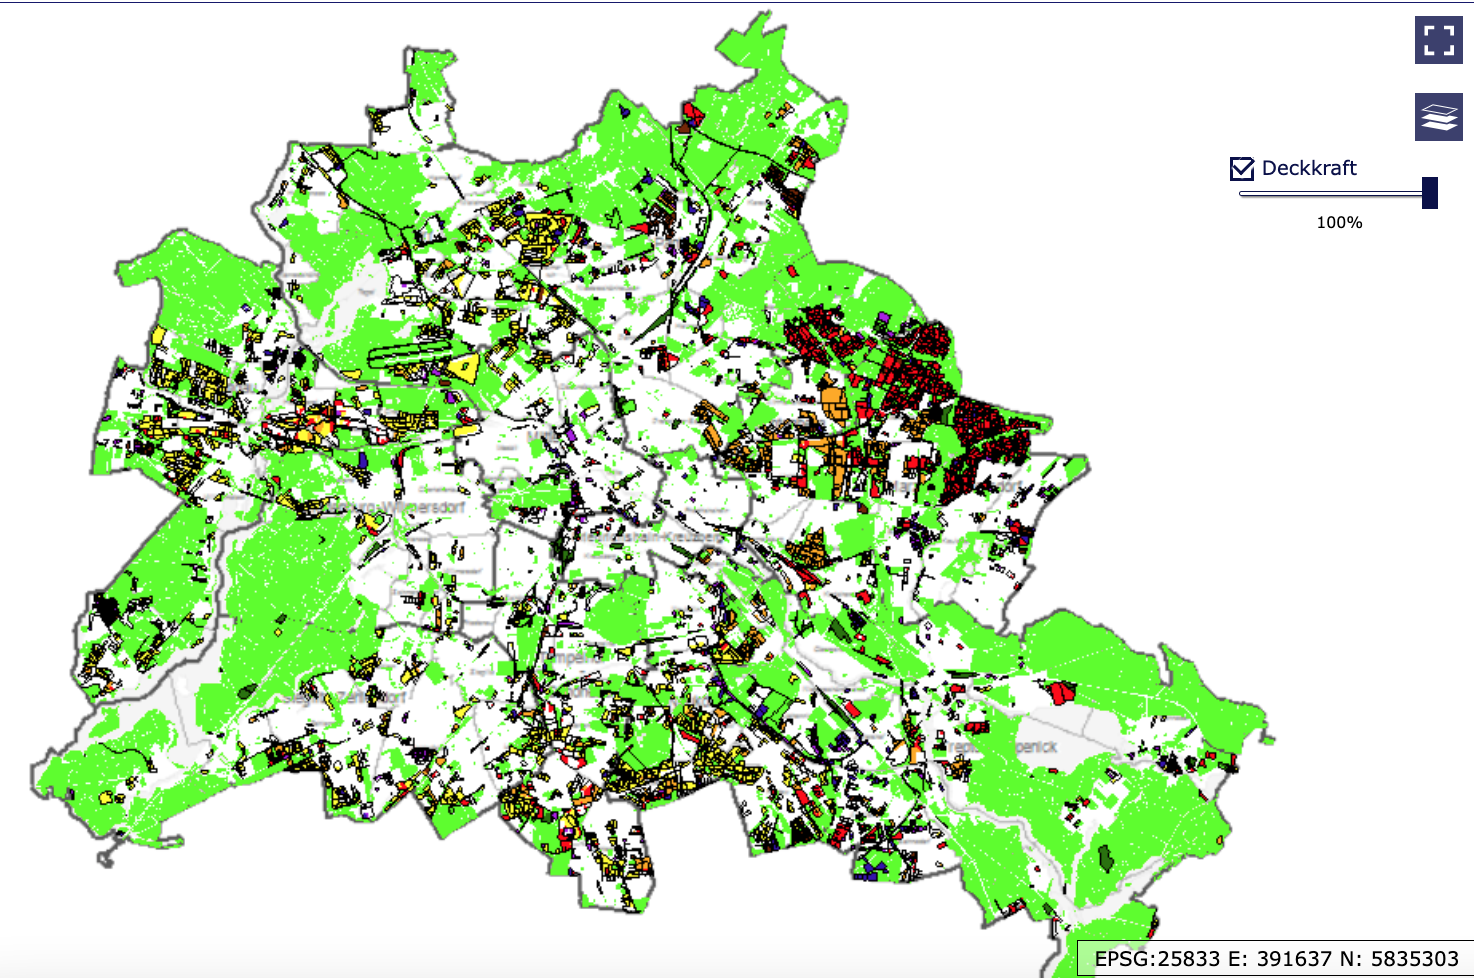


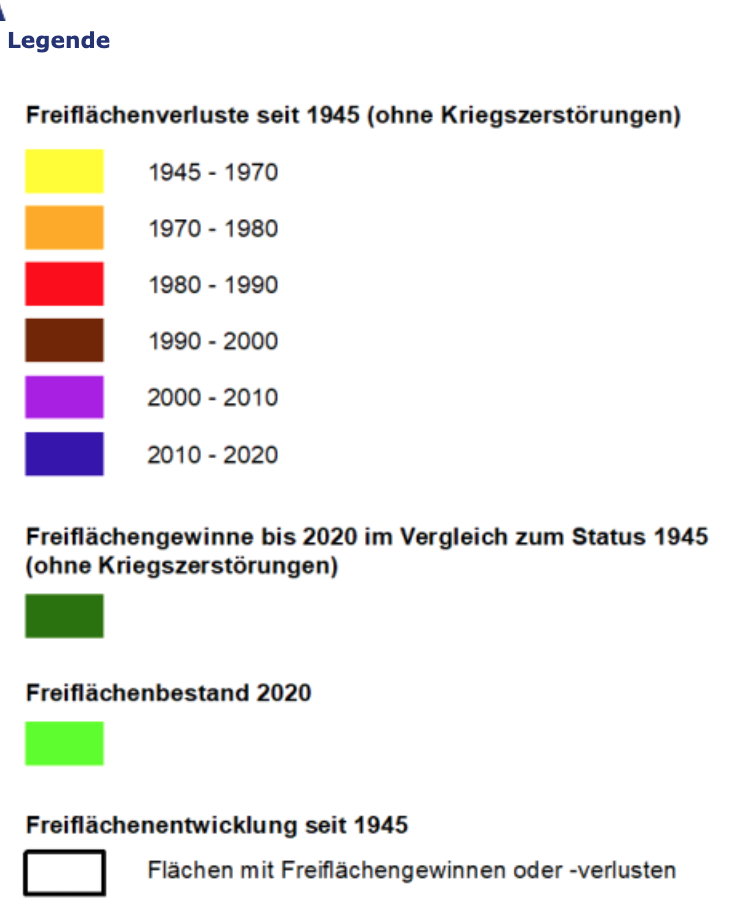

# Sozialindex

In [20]:
columns = ['ant_arbeitslose', 'ant_transfer',
       'Kinderarmut']

In [28]:
social_index_2021_pr2021.Kinderarmut.dtype

dtype('O')

In [38]:
social_index_2021_pr2021['ant_arbeitslose'].replace(',','.', inplace=True)

In [39]:
social_index_2021_pr2021

PLR_ID                     Name      EW ant_arbeitslose ant_transfer  \
0     1100101             Stülerstraße   3.419            4,23         8,04   
1     1100102        Großer Tiergarten   1.791            1,16         3,46   
2     1100103             Lützowstraße   5.211            5,32        15,52   
3     1100104             Körnerstraße   4.636            6,18        18,01   
4     1100205            Wilhelmstraße   2.573            2,88         6,34   
..        ...                      ...     ...             ...          ...   
537  12601032        Rollbergesiedlung   5.922           10,62        32,54   
538  12601133  Treuenbrietzener Straße  11.610           10,84        28,29   
539  12601134       Märkisches Zentrum  14.722            9,34        23,14   
540  12601235         Dannenwalder Weg  10.656            9,55        27,41   
541  12601236        Schorfheidestraße   3.131            2,70         7,09   

    Kinderarmut ant_arbeitslose_dyn ant_transfer_dyn Kinderarmut_dyn  
0         19,40                1,46             0,39            3,96  
1          8,33                0,24             0,93            4,92  
2         32,63                0,93            -2,16           -4,87  
3         39,94                1,25            -0,71           -2,66  
4         19,76                0,51            -1,65            0,73  
..          ...                 ...              ...             ...  
537       65,22                1,62            -2,37           -0,99  
538       54,35                2,84            -4,17           -5,45  
539       51,53                1,91            -3,22           -5,82  
540       52,52                1,77            -2,18           -3,95  
541       19,43                0,52            -2,23           -6,22  

[542 rows x 9 columns]

In [45]:
social_index_2021_pr2021.dtypes

PLR_ID                   int64
Name                    object
EW                     float64
ant_arbeitslose         object
ant_transfer            object
Kinderarmut             object
ant_arbeitslose_dyn     object
ant_transfer_dyn        object
Kinderarmut_dyn         object
dtype: object

In [46]:
for c in columns: 
    social_index_2021_pr2021[f'num_{c}'] = social_index_2021_pr2021[c]

In [7]:
pr2021['PLR_ID'] = pd.to_numeric(pr2021['PLR_ID'])

In [8]:
social_index_2021_pr2021.columns = ['PLR_ID', 'Name', 'EW', 'ant_arbeitslose', 'ant_transfer',
       'Kinderarmut', 'ant_arbeitslose_dyn', 'ant_transfer_dyn',
       'Kinderarmut_dyn']

In [9]:
type(pr2021.PLR_ID)
type(social_index_2021_pr2021.PLR_ID)

pandas.core.series.Series

In [10]:
merged_data_2021 = social_index_2021_pr2021.merge(pr2021, on='PLR_ID')


In [11]:
merged_data_2021 = gp.GeoDataFrame(merged_data_2021)

<AxesSubplot:>

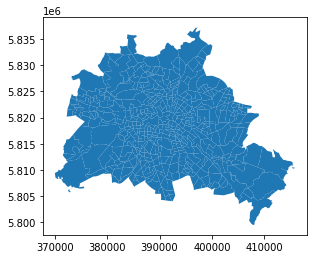

In [12]:
merged_data_2021.plot()

In [110]:
#merged_data_2021["centroid"] = merged_data_2021.geometry.centroid

#merged_data_2021 = merged_data_2021.set_geometry("centroid")

#merged_data_2021.plot()

In [13]:
pr_2019 = gp.read_file('../data/Maps/Berlin_Planungsräume_25833.shp')

<AxesSubplot:>

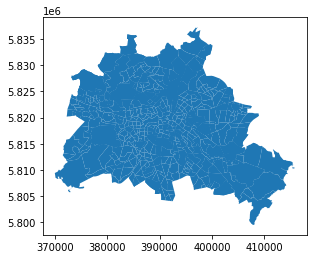

In [125]:
pr_2019.sjoin(merged_data_2021.drop(columns=('geometry')), how='left').plot()




In [14]:
intersect_layer = pr_2019.overlay(merged_data_2021, how='intersection')

In [15]:
intersect_layer['area_int'] = intersect_layer['geometry'].area

In [16]:
intersect_layer

OBJECTID spatial_na                spatial_al spatial_ty  \
0            1   01011101              Stülerstraße    Polygon   
1            2   01011102         Großer Tiergarten    Polygon   
2            3   01011103              Lützowstraße    Polygon   
3            5   01011105  Nördlicher Landwehrkanal    Polygon   
4          138   04030931          Breitscheidplatz    Polygon   
...        ...        ...                       ...        ...   
3079       440   12302107         Schorfheidestraße    Polygon   
3080       441   12302108        Märkisches Zentrum    Polygon   
3081       442   12302109   Treuenbrietzener Straße    Polygon   
3082       443   12302110          Dannenwalder Weg    Polygon   
3083       444   12302211           Lübarser Straße    Polygon   

                       PLRNAME                     BEZNAME  \
0                 Stülerstraße                       Mitte   
1            Großer Tiergarten                       Mitte   
2                 Lützowstraße                       Mitte   
3     Nördlicher Landwehrkanal                       Mitte   
4             Breitscheidplatz  Charlottenburg-Wilmersdorf   
...                        ...                         ...   
3079         Schorfheidestraße               Reinickendorf   
3080        Märkisches Zentrum               Reinickendorf   
3081   Treuenbrietzener Straße               Reinickendorf   
3082          Dannenwalder Weg               Reinickendorf   
3083           Lübarser Straße               Reinickendorf   

                    DATUM    Shape__Are    Shape__Len Plr_Nummer  ...  \
0     2006-06-14T00:00:00  9.888231e+05   5535.908680   01011101  ...   
1     2006-06-14T00:00:00  8.115685e+06  17021.974583   01011102  ...   
2     2006-06-14T00:00:00  1.408009e+06   5328.004505   01011103  ...   
3     2006-06-14T00:00:00  2.519593e+06   8430.061607   01011105  ...   
4     2006-06-14T00:00:00  1.626615e+06   6491.716907   04030931  ...   
...                   ...           ...           ...        ...  ...   
3079  2009-02-19T00:00:00  1.537838e+06   6952.531720   12302107  ...   
3080  2009-02-19T00:00:00  3.078608e+06   9651.501372   12302108  ...   
3081  2009-02-19T00:00:00  2.485309e+06   7133.347727   12302109  ...   
3082  2009-02-19T00:00:00  1.416865e+06   9414.678659   12302110  ...   
3083  2009-02-19T00:00:00  3.069275e+06   8833.071862   12302211  ...   

                PLR_NAME  BZR_ID        BZR_NAME PGR_ID            PGR_NAME  \
0           Stülerstraße  011001  Tiergarten Süd   0110             Zentrum   
1           Stülerstraße  011001  Tiergarten Süd   0110             Zentrum   
2           Stülerstraße  011001  Tiergarten Süd   0110             Zentrum   
3           Stülerstraße  011001  Tiergarten Süd   0110             Zentrum   
4           Stülerstraße  011001  Tiergarten Süd   0110             Zentrum   
...                  ...     ...             ...    ...                 ...   
3079  Märkisches Zentrum  126011         MV Nord   1260  Märkisches Viertel   
3080  Märkisches Zentrum  126011         MV Nord   1260  Märkisches Viertel   
3081  Märkisches Zentrum  126011         MV Nord   1260  Märkisches Viertel   
3082  Märkisches Zentrum  126011         MV Nord   1260  Märkisches Viertel   
3083  Märkisches Zentrum  126011         MV Nord   1260  Märkisches Viertel   

     BEZ       FINHALT       STAND  \
0     01  3.669331e+05  01.01.2021   
1     01  3.669331e+05  01.01.2021   
2     01  3.669331e+05  01.01.2021   
3     01  3.669331e+05  01.01.2021   
4     01  3.669331e+05  01.01.2021   
...   ..           ...         ...   
3079  12  1.127871e+06  01.01.2021   
3080  12  1.127871e+06  01.01.2021   
3081  12  1.127871e+06  01.01.2021   
3082  12  1.127871e+06  01.01.2021   
3083  12  1.127871e+06  01.01.2021   

                                               geometry      area_int  
0     POLYGON ((387323.142 5818572.301, 387418.885 5...  3.664868e+05  
1     MULTIPOLYGON (((388082.937 5819006.

# Loading school data

In [3]:
schools_list = pd.read_excel('../raw_data/Schulen.xlsx')

schools_list = schools_list.drop(index=0)
new_header = schools_list.iloc[0] #grab the first row for the header
schools_list = schools_list[1:] #take the data less the header row
schools_list.columns = new_header #set the header row as the df header

schools_list = schools_list[schools_list.Traeger!='privat']
schools_list = schools_list[['BSN', 'NAME', 'Bezirk', 'PLZ', 'Adresse']]

schools_list

1      BSN                         NAME         Bezirk    PLZ  \
2    01G01   Grundschule am Arkonaplatz          Mitte  10115   
3    01G02         Papageno-Grundschule          Mitte  10115   
4    01G04    Kastanienbaum-Grundschule          Mitte  10119   
5    01G05        Grundschule Neues Tor          Mitte  10115   
6    01G07        GutsMuths-Grundschule          Mitte  10179   
..     ...                          ...            ...    ...   
439  12G29   Hermann-Schulz-Grundschule  Reinickendorf  13403   
440  12G30    Reineke-Fuchs-Grundschule  Reinickendorf  13403   
441  12G32  Charlie-Chaplin-Grundschule  Reinickendorf  13439   
442  12G33       Lauterbach-Grundschule  Reinickendorf  13435   
443  12G34  Otfried-Preu߬er-Grundschule  Reinickendorf  13503   

1                     Adresse  
2         Ruppiner Str. 47-48  
3                 Bergstr. 58  
4               Gipsstr. 23 A  
5        Hannoversche Str. 20  
6                Singerstr. 8  
..                        ...  
439       Kienhorststr. 67-79  
440                 Foxweg 15  
441  Wilhelmsruher Damm 90-94  
442     Senftenberger Ring 41  
443    Schulzendorfer Str. 99  

[379 rows x 5 columns]

In [4]:
schools_stat = pd.read_excel('../raw_data/schools_stat.xlsx')

new_header = schools_stat.iloc[0] #grab the first row for the header
schools_stat = schools_stat[1:] #take the data less the header row
schools_stat.columns = new_header #set the header row as the df header

schools_stat.columns = ['School_year', 'BSN', 'NAME', 'children', 'children_f',
       'children_m', 'teachers', 'teachers_f', 'teachers_m']

schools_stat = schools_stat.drop(columns='NAME')

In [5]:
schools = schools_list.merge(schools_stat, how='left', on='BSN')
schools

BSN                         NAME         Bezirk    PLZ  \
0    01G01   Grundschule am Arkonaplatz          Mitte  10115   
1    01G02         Papageno-Grundschule          Mitte  10115   
2    01G04    Kastanienbaum-Grundschule          Mitte  10119   
3    01G05        Grundschule Neues Tor          Mitte  10115   
4    01G07        GutsMuths-Grundschule          Mitte  10179   
..     ...                          ...            ...    ...   
374  12G29   Hermann-Schulz-Grundschule  Reinickendorf  13403   
375  12G30    Reineke-Fuchs-Grundschule  Reinickendorf  13403   
376  12G32  Charlie-Chaplin-Grundschule  Reinickendorf  13439   
377  12G33       Lauterbach-Grundschule  Reinickendorf  13435   
378  12G34  Otfried-Preu߬er-Grundschule  Reinickendorf  13503   

                      Adresse School_year children children_f children_m  \
0         Ruppiner Str. 47-48     2021/22      427        203        224   
1                 Bergstr. 58     2021/22      592        318        274   
2               Gipsstr. 23 A     2021/22      400        181        219   
3        Hannoversche Str. 20     2021/22      401        188        213   
4                Singerstr. 8     2021/22      361        168        193   
..                        ...         ...      ...        ...        ...   
374       Kienhorststr. 67-79     2021/22      390        178        212   
375                 Foxweg 15     2021/22      463        231        232   
376  Wilhelmsruher Damm 90-94     2021/22      472        217        255   
377     Senftenberger Ring 41     2021/22      547        261        286   
378    Schulzendorfer Str. 99     2021/22      615        298        317   

    teachers teachers_f teachers_m  
0         32         28          4  
1         45         32         13  
2         29         24          5  
3         38         29          9  
4         29         24          5  
..       ...        ...        ...  
374       39         28         11  
375       38         36          2  
376       42         33          9  
377       58         43         15  
378       45         40          5  

[379 rows x 12 columns]

In [7]:
sum_children = schools.children.sum()
schools["teachers_rate"]= schools.teachers / schools.children
schools["capacity_rate"]= schools.children / sum_children

schools.to_csv('../data/schools.csv', index=False)

pd.read_csv('../data/schools.csv')

BSN                         NAME         Bezirk    PLZ  \
0    01G01   Grundschule am Arkonaplatz          Mitte  10115   
1    01G02         Papageno-Grundschule          Mitte  10115   
2    01G04    Kastanienbaum-Grundschule          Mitte  10119   
3    01G05        Grundschule Neues Tor          Mitte  10115   
4    01G07        GutsMuths-Grundschule          Mitte  10179   
..     ...                          ...            ...    ...   
374  12G29   Hermann-Schulz-Grundschule  Reinickendorf  13403   
375  12G30    Reineke-Fuchs-Grundschule  Reinickendorf  13403   
376  12G32  Charlie-Chaplin-Grundschule  Reinickendorf  13439   
377  12G33       Lauterbach-Grundschule  Reinickendorf  13435   
378  12G34  Otfried-Preu߬er-Grundschule  Reinickendorf  13503   

                      Adresse School_year  children  children_f  children_m  \
0         Ruppiner Str. 47-48     2021/22     427.0       203.0       224.0   
1                 Bergstr. 58     2021/22     592.0       318.0       274.0   
2               Gipsstr. 23 A     2021/22     400.0       181.0       219.0   
3        Hannoversche Str. 20     2021/22     401.0       188.0       213.0   
4                Singerstr. 8     2021/22     361.0       168.0       193.0   
..                        ...         ...       ...         ...         ...   
374       Kienhorststr. 67-79     2021/22     390.0       178.0       212.0   
375                 Foxweg 15     2021/22     463.0       231.0       232.0   
376  Wilhelmsruher Damm 90-94     2021/22     472.0       217.0       255.0   
377     Senftenberger Ring 41     2021/22     547.0       261.0       286.0   
378    Schulzendorfer Str. 99     2021/22     615.0       298.0       317.0   

     teachers  teachers_f  teachers_m  teachers_rate  capacity_rate  
0        32.0        28.0         4.0       0.074941       0.002524  
1        45.0        32.0        13.0       0.076014       0.003500  
2        29.0        24.0         5.0       0.072500       0.002365  
3        38.0        29.0         9.0       0.094763       0.002371  
4        29.0        24.0         5.0       0.080332       0.002134  
..        ...         ...         ...            ...            ...  
374      39.0        28.0        11.0       0.100000       0.002306  
375      38.0        36.0         2.0       0.082073       0.002737  
376      42.0        33.0         9.0       0.088983       0.002790  
377      58.0        43.0        15.0       0.106033       0.003234  
378      45.0        40.0         5.0       0.073171       0.003636  

[379 rows x 14 columns]

## Fixing formatting issues 

In [9]:
schools['Adresses'] = schools.Adresse + ' ' + schools.PLZ.astype(str) + ' Berlin'

schools['Adresses'].iloc[111] = 'Spandauer Damm 205 14050 Berlin'
schools['Adresses'].iloc[132] = 'Maikaerpfad 30 14055 Berlin'

schools['Adresses'].iloc[132] = 'Maikaerpfad 30 14055 Berlin'

schools['Adresses'].iloc[153] = 'Raenitzer Steig 12 13593 Berlin'

schools['NAME'].iloc[171] = 'Flaeming-Grundschule'
schools['Adresses'].iloc[171] = 'Illstr. 4 12161 Berlin'
schools['Adresses'].iloc[250]= 'An den Achterhöfen 13 12349 Berlin'

schools['Adresses'].iloc[255]= 'Wildhüterweg 5, 12353 Berlin'

schools['Adresses'].iloc[171] = 'Ludwigsfelder Str. 43 14165 Berlin'

schools['Adresses'].iloc[258] = 'Haenselstr. 6 12057 Berlin'
schools['NAME'].iloc[258] = 'Schule in der Koellnischen Heide'

schools['Adresses'].iloc[262] = 'Haenselstr. 14 12437 Berlin'

schools['Adresses'].iloc[307] = 'Erich-Kaestner-Straße 64 12619 Berlin'

schools['Adresses'].iloc[317] = 'Bernhard-Baestlein-Straße 22 10367 Berlin'

schools['Adresses'].iloc[340] = 'Dolgenseestraße 60 10319 Berlin'

schools['Adresses'].iloc[341] = 'Bernhard-Baestlein-Straße 56 10367 Berlin'

schools['Adresses'].iloc[350] = 'Hollaenderstraße 25-30, 13407 Berlin'
schools['NAME'].iloc[350] = 'Grundschule am Schaersee'

schools['Adresses'].iloc[356] = 'Tornower Weg 26 13439 Berlin'


In [14]:
schools

BSN                         NAME         Bezirk    PLZ  \
0    01G01   Grundschule am Arkonaplatz          Mitte  10115   
1    01G02         Papageno-Grundschule          Mitte  10115   
2    01G04    Kastanienbaum-Grundschule          Mitte  10119   
3    01G05        Grundschule Neues Tor          Mitte  10115   
4    01G07        GutsMuths-Grundschule          Mitte  10179   
..     ...                          ...            ...    ...   
374  12G29   Hermann-Schulz-Grundschule  Reinickendorf  13403   
375  12G30    Reineke-Fuchs-Grundschule  Reinickendorf  13403   
376  12G32  Charlie-Chaplin-Grundschule  Reinickendorf  13439   
377  12G33       Lauterbach-Grundschule  Reinickendorf  13435   
378  12G34  Otfried-Preu߬er-Grundschule  Reinickendorf  13503   

                      Adresse School_year children children_f children_m  \
0         Ruppiner Str. 47-48     2021/22      427        203        224   
1                 Bergstr. 58     2021/22      592        318        274   
2               Gipsstr. 23 A     2021/22      400        181        219   
3        Hannoversche Str. 20     2021/22      401        188        213   
4                Singerstr. 8     2021/22      361        168        193   
..                        ...         ...      ...        ...        ...   
374       Kienhorststr. 67-79     2021/22      390        178        212   
375                 Foxweg 15     2021/22      463        231        232   
376  Wilhelmsruher Damm 90-94     2021/22      472        217        255   
377     Senftenberger Ring 41     2021/22      547        261        286   
378    Schulzendorfer Str. 99     2021/22      615        298        317   

    teachers teachers_f teachers_m teachers_rate capacity_rate  \
0         32         28          4      0.074941      0.002524   
1         45         32         13      0.076014        0.0035   
2         29         24          5        0.0725      0.002365   
3         38         29          9      0.094763      0.002371   
4         29         24          5      0.080332      0.002134   
..       ...        ...        ...           ...           ...   
374       39         28         11           0.1      0.002306   
375       38         36          2      0.082073      0.002737   
376       42         33          9      0.088983       0.00279   
377       58         43         15      0.106033      0.003234   
378       45         40          5      0.073171      0.003636   

                                  Adresses  
0         Ruppiner Str. 47-48 10115 Berlin  
1                 Bergstr. 58 10115 Berlin  
2               Gipsstr. 23 A 10119 Berlin  
3        Hannoversche Str. 20 10115 Berlin  
4                Singerstr. 8 10179 Berlin  
..                                     ...  
374       Kienhorststr. 67-79 13403 Berlin  
375                 Foxweg 15 13403 Berlin  
376  Wilhelmsruher Damm 90-94 13439 Berlin  
377     Senftenberger Ring 41 13435 Berlin  
378    Schulzendorfer Str. 99 13503 Berlin  

[379 rows x 15 columns]

## Geocoding schools addresses

In [48]:
schools_location = gp.GeoDataFrame({'location':range(0,379)})


In [52]:
for i in schools.index: 
    sleep(5)
    schools_location['location'].iloc[i] = gp.tools.geocode(schools.Adresses[i])['geometry'].iloc[0]

/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/internals/blocks.py:937: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr_value = np.asarray(value)
/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/internals/blocks.py:937: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr_value = np.asarray(value)
/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/internals/blocks.py:937: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr_value = np.asarray(value)
/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/internals/blocks.py:937: S

/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/internals/blocks.py:937: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr_value = np.asarray(value)
/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/internals/blocks.py:937: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr_value = np.asarray(value)
/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/internals/blocks.py:937: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr_value = np.asarray(value)
/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/internals/blocks.py:937: S

GeocoderUnavailable: HTTPSConnectionPool(host='photon.komoot.io', port=443): Max retries exceeded with url: /api?q=Lasdehner+Str.+21-23+10243+Berlin&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='photon.komoot.io', port=443): Read timed out. (read timeout=1)"))

In [16]:
schools_loc1 = gp.tools.geocode(schools.Adresses[0:100])

GeocoderUnavailable: HTTPSConnectionPool(host='photon.komoot.io', port=443): Max retries exceeded with url: /api?q=Wilhelmstr.+52+10117+Berlin&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='photon.komoot.io', port=443): Read timed out. (read timeout=1)"))

In [ ]:
schools_loc3 = gp.tools.geocode(schools.Adresses[100:200])

In [160]:
schools_loc3 = gp.tools.geocode(schools.Adresses[200:300])

In [161]:
schools_loc4 = gp.tools.geocode(schools.Adresses[300:])

In [375]:
schools_location = pd.concat([schools_loc1, schools_loc2, schools_loc3, schools_loc4], axis=0)

In [384]:
schools['location'] = schools_location['geometry']

In [388]:
indexes = [250, 255, 258,  260, 262]

for i in indexes: 
    schools[['location']].iloc[i] = gp.tools.geocode(schools.Adresses[i])['geometry'].iloc[0]
    schools['Adresses'].iloc[i] = schools['Adresses'].iloc[i]

/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

In [389]:
indexes = [307, 317, 340, 341, 350, 356]

for i in indexes: 
    schools[['location']].iloc[i] = gp.tools.geocode(schools.Adresses[i])['geometry'].iloc[0]
    schools['Adresses'].iloc[i] = schools['Adresses'].iloc[i]

/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

In [441]:
schools[schools.location.isna()]

Empty DataFrame
Columns: [BSN, NAME, Bezirk, PLZ, Adresse, School_year, children, children_f, children_m, teachers, teachers_f, teachers_m, teachers_rate, capacity_rate, Adresses, location, geometry]
Index: []

In [442]:
schools_geo = gp.GeoDataFrame(
    schools, geometry=schools.location)

In [472]:
schools_geo.isna().sum()

BSN              0
NAME             0
Bezirk           0
PLZ              0
Adresse          0
School_year      5
children         5
children_f       5
children_m       5
teachers         5
teachers_f       5
teachers_m       5
teachers_rate    5
capacity_rate    5
Adresses         0
location         0
geometry         0
dtype: int64

In [444]:
schools_geo = schools_geo.to_crs(epsg=(3857))

In [473]:
school_districts = gp.read_file('/Users/Safia/Documents/Mapping_Social_Inequalities/Maps/ESB2012_WGS84_EWR2012-12/ESB2012_WGS84_EWR2012-12.shp')


In [480]:
schools_points = school_districts.sjoin(schools_geo, how='right', predicate = 'intersects')

In [440]:
#schools['location'].iloc[204] = gp.tools.geocode(schools.Adresses[204])['geometry'].iloc[0]

In [481]:
schools_points[schools_points.ESB.isna() == True]

index_left   ID  ESB  BEZ  FLAECHE_HA QUELLE QUELLEURL EMAIL LIZENZ  \
255         NaN  NaN  NaN  NaN         NaN    NaN       NaN   NaN    NaN   
260         NaN  NaN  NaN  NaN         NaN    NaN       NaN   NaN    NaN   

    ZEITBEZUG  ... children_f  children_m  teachers  teachers_f  teachers_m  \
255       NaN  ...        115         143        19          14           5   
260       NaN  ...        142         146        21          18           3   

     teachers_rate  capacity_rate                                Adresses  \
255       0.073643       0.001525            Wildhüterweg 5, 12353 Berlin   
260       0.072917       0.001703  Lieselotte-Berger-Str. 65 12355 Berlin   

                      location                         geometry  
255  POINT (13.45747 52.42097)  POINT (1498078.447 6876602.559)  
260  POINT (13.50162 52.40052)  POINT (1502994.015 6872871.428)  

[2 rows x 36 columns]

In [491]:
missings = schools_geo[schools_points.ESB.isna() == True]

In [495]:
missings_nearest_merge = school_districts.sjoin_nearest(
        missings, how='right')

In [496]:
missings_nearest_merge

index_left    ID   ESB BEZ  FLAECHE_HA  \
255         225  0834  0834  08    134.2635   
260         228  0837  0837  08    113.2631   

                                   QUELLE                         QUELLEURL  \
255  Amt für Statistik Berlin-Brandenburg  www.statistik-berlin-brandenburg   
260  Amt für Statistik Berlin-Brandenburg  www.statistik-berlin-brandenburg   

                    EMAIL                   LIZENZ ZEITBEZUG  ... children_f  \
255  rbs@statistik-bbb.de  CC-BY 3.0 Namensnennung      2012  ...        115   
260  rbs@statistik-bbb.de  CC-BY 3.0 Namensnennung      2012  ...        142   

     children_m  teachers  teachers_f  teachers_m  teachers_rate  \
255         143        19          14           5       0.073643   
260         146        21          18           3       0.072917   

     capacity_rate                                Adresses  \
255       0.001525            Wildhüterweg 5, 12353 Berlin   
260       0.001703  Lieselotte-Berger-Str. 65 12355 Berlin   

                      location                         geometry  
255  POINT (13.45747 52.42097)  POINT (1498078.447 6876602.559)  
260  POINT (13.50162 52.40052)  POINT (1502994.015 6872871.428)  

[2 rows x 36 columns]

In [498]:
schools_points.iloc[255] = missings_nearest_merge.iloc[0]
schools_points.iloc[260] = missings_nearest_merge.iloc[1]

<AxesSubplot:>

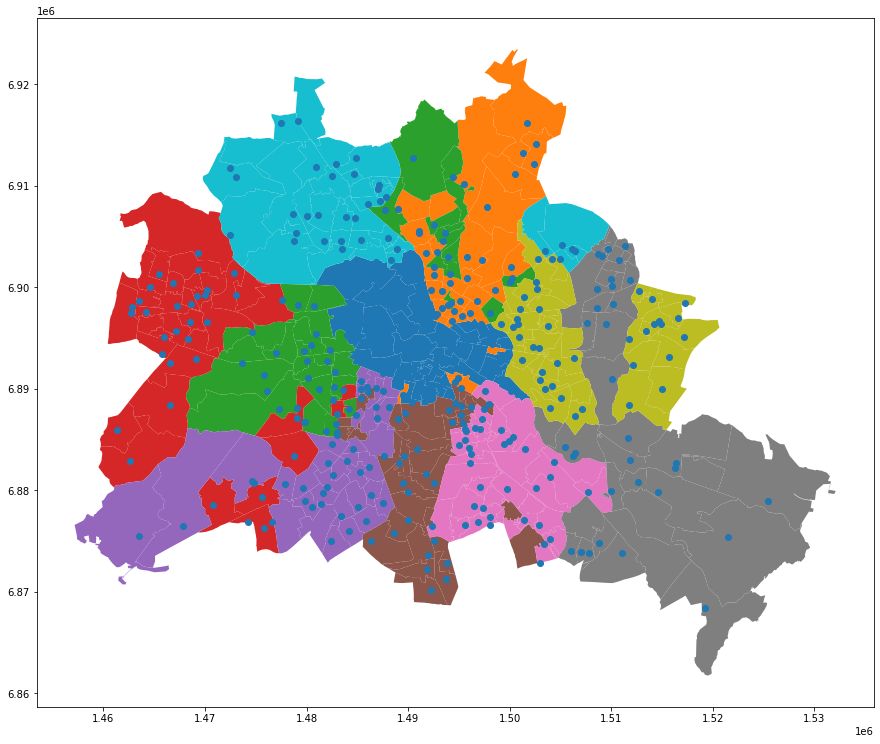

In [503]:
fig, ax = plt.subplots(figsize=(15, 15))
school_districts.plot(column=('ESB'), ax=ax)
schools_points.plot(ax = ax)


In [521]:
ESB2018 = gp.read_file('/Users/Safia/Documents/Mapping_Social_Inequalities/Maps/Berlin_Grundschuleinzugsbereiche20182019_25833.shp')




In [526]:
ESB2018.head()

OBJECTID_1  OBJECTID   ESB BEZ                   BEZName    Shape_Leng  \
0           1         1  0222  02  Friedrichshain-Kreuzberg   3679.782466   
1           2         2  0805  08                      Neuk   2934.508729   
2           3         3  0305  03                    Pankow   2889.418940   
3           4         4  1010  10       Marzahn-Hellersdorf  11313.547845   
4           5         5  0514  05                   Spandau   9854.088778   

     Shape__Are    Shape__Len  \
0  1.326213e+06   6040.587658   
1  1.042076e+06   4816.567620   
2  9.675021e+05   4745.564485   
3  1.024096e+07  18594.748346   
4  1.305560e+07  16195.060329   

                                            geometry  
0  POLYGON ((392790.816 5817320.787, 392818.620 5...  
1  POLYGON ((393581.953 5816411.512, 393619.625 5...  
2  POLYGON ((393384.391 5821374.239, 393468.559 5...  
3  POLYGON ((401232.997 5824569.912, 401396.946 5...  
4  POLYGON ((373981.081 5820471.604, 373939.938 5...

<AxesSubplot:>

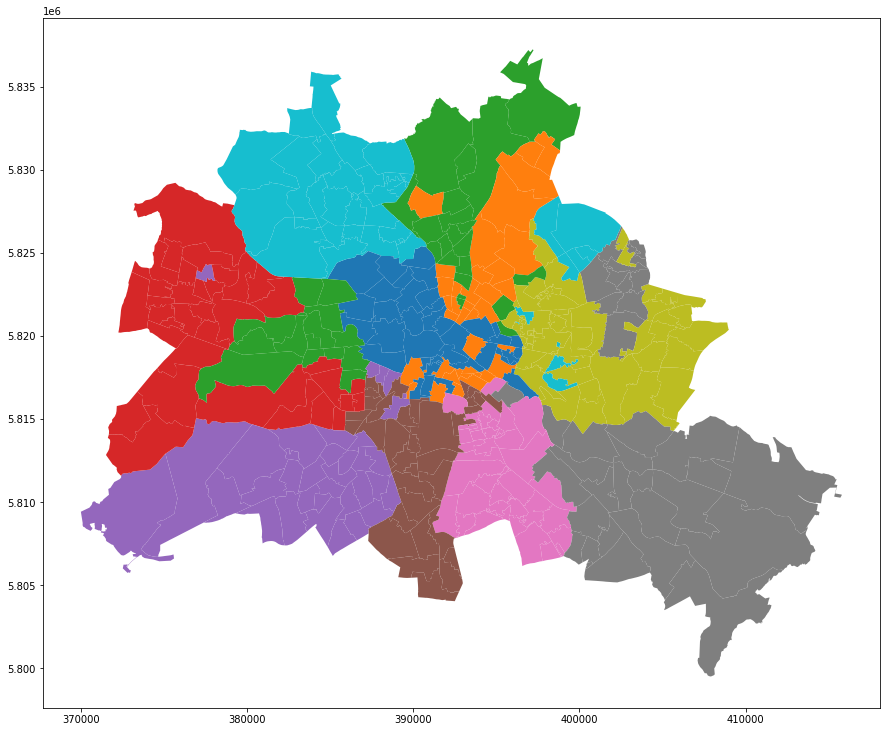

In [525]:
ESB2018.plot(column='ESB', figsize=(15,15))

<AxesSubplot:>

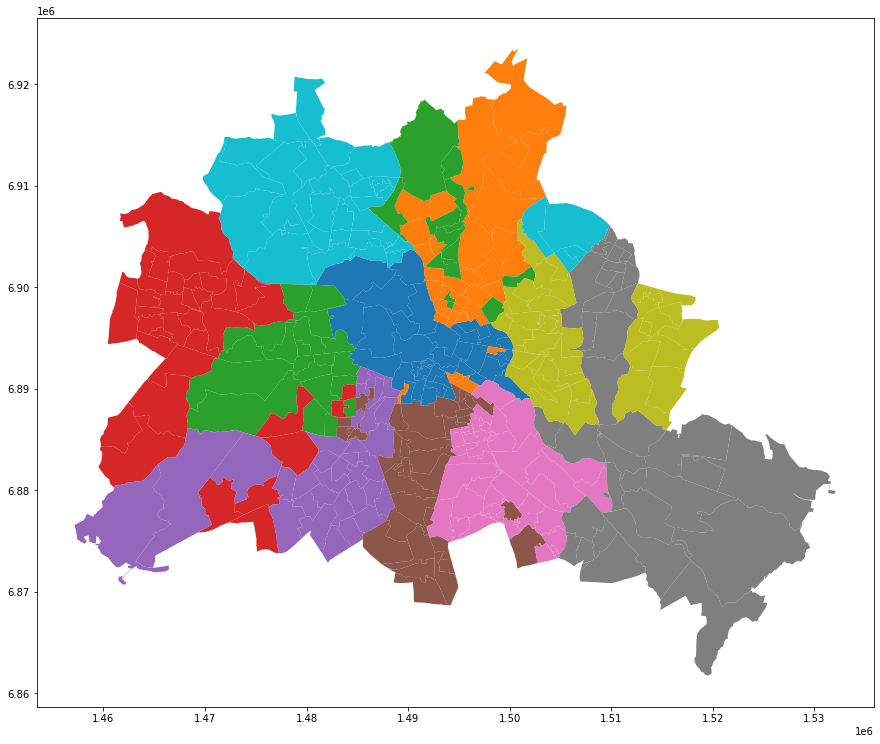

In [528]:
school_districts.plot(column='ESB', figsize=(15,15))

In [512]:
schools_points.to_csv('schools_location')

In [515]:
schools_points.head()

index_left    ID   ESB BEZ  FLAECHE_HA  \
0         6.0  0107  0107  01    362.2863   
1         6.0  0107  0107  01    362.2863   
2         6.0  0107  0107  01    362.2863   
3         5.0  0106  0106  01    180.8529   
4        10.0  0111  0111  01    215.8888   

                                 QUELLE                         QUELLEURL  \
0  Amt für Statistik Berlin-Brandenburg  www.statistik-berlin-brandenburg   
1  Amt für Statistik Berlin-Brandenburg  www.statistik-berlin-brandenburg   
2  Amt für Statistik Berlin-Brandenburg  www.statistik-berlin-brandenburg   
3  Amt für Statistik Berlin-Brandenburg  www.statistik-berlin-brandenburg   
4  Amt für Statistik Berlin-Brandenburg  www.statistik-berlin-brandenburg   

                  EMAIL                   LIZENZ ZEITBEZUG  ... children_f  \
0  rbs@statistik-bbb.de  CC-BY 3.0 Namensnennung      2012  ...        203   
1  rbs@statistik-bbb.de  CC-BY 3.0 Namensnennung      2012  ...        318   
2  rbs@statistik-bbb.de  CC-BY 3.0 Namensnennung      2012  ...        181   
3  rbs@statistik-bbb.de  CC-BY 3.0 Namensnennung      2012  ...        188   
4  rbs@statistik-bbb.de  CC-BY 3.0 Namensnennung      2012  ...        168   

   children_m  teachers  teachers_f  teachers_m  teachers_rate  capacity_rate  \
0         224        32          28           4       0.074941       0.002524   
1         274        45          32          13       0.076014         0.0035   
2         219        29          24           5         0.0725       0.002365   
3         213        38          29           9       0.094763       0.002371   
4         193        29          24           5       0.080332       0.002134   

                            Adresses                   location  \
0   Ruppiner Str. 47-48 10115 Berlin  POINT (13.40027 52.53722)   
1           Bergstr. 58 10115 Berlin  POINT (13.39108 52.53281)   
2         Gipsstr. 23 A 10119 Berlin  POINT (13.40181 52.52667)   
3  Hannoversche Str. 20 10115 Berlin  POINT (13.38063 52.52735)   
4          Singerstr. 8 10179 Berlin  POINT (13.42412 52.51629)   

                          geometry  
0  POINT (1491711.611 6897851.216)  
1  POINT (1490688.489 6897043.117)  
2  POINT (1491883.132 6895919.756)  
3  POINT (1489524.874 6896044.600)  
4  POINT (1494365.735 6894021.880)  

[5 rows x 36 columns]

In [518]:
schools_info = schools_points[['BSN', 'NAME', 'ESB', 'BEZ', 'FLAECHE_HA','School_year', 'children',
       'children_f', 'children_m', 'teachers', 'teachers_f', 'teachers_m',
       'teachers_rate', 'capacity_rate', 'Adresses','Bezirk', 'location', 'geometry','EW_insgesa', 'EW_U6',
       'EW_6U14', 'EW_14U18', 'EW_18U25', 'EW_25U45', 'EW_45U65', 'EW_65plus',
       ]]

In [519]:
schools_info

BSN                         NAME   ESB BEZ  FLAECHE_HA School_year  \
0    01G01   Grundschule am Arkonaplatz  0107  01    362.2863     2021/22   
1    01G02         Papageno-Grundschule  0107  01    362.2863     2021/22   
2    01G04    Kastanienbaum-Grundschule  0107  01    362.2863     2021/22   
3    01G05        Grundschule Neues Tor  0106  01    180.8529     2021/22   
4    01G07        GutsMuths-Grundschule  0111  01    215.8888     2021/22   
..     ...                          ...   ...  ..         ...         ...   
374  12G29   Hermann-Schulz-Grundschule  1229  12    100.3129     2021/22   
375  12G30    Reineke-Fuchs-Grundschule  1230  12    136.2479     2021/22   
376  12G32  Charlie-Chaplin-Grundschule  1232  12     48.2276     2021/22   
377  12G33       Lauterbach-Grundschule  1227  12     46.9596     2021/22   
378  12G34  Otfried-Preu߬er-Grundschule  1234  12    711.8965     2021/22   

    children children_f children_m teachers  ...                   location  \
0        427        203        224       32  ...  POINT (13.40027 52.53722)   
1        592        318        274       45  ...  POINT (13.39108 52.53281)   
2        400        181        219       29  ...  POINT (13.40181 52.52667)   
3        401        188        213       38  ...  POINT (13.38063 52.52735)   
4        361        168        193       29  ...  POINT (13.42412 52.51629)   
..       ...        ...        ...      ...  ...                        ...   
374      390        178        212       39  ...  POINT (13.32526 52.57353)   
375      463        231        232       38  ...  POINT (13.31030 52.57378)   
376      472        217        255       42  ...  POINT (13.36505 52.59753)   
377      547        261        286       58  ...  POINT (13.35945 52.60370)   
378      615        298        317       45  ...  POINT (13.22718 52.61306)   

                            geometry EW_insgesa   EW_U6 EW_6U14 EW_14U18  \
0    POINT (1491711.611 6897851.216)    54380.0  4228.0  3963.0   1504.0   
1    POINT (1490688.489 6897043.117)    54380.0  4228.0  3963.0   1504.0   
2    POINT (1491883.132 6895919.756)    54380.0  4228.0  3963.0   1504.0   
3    POINT (1489524.874 6896044.600)     7176.0   424.0   319.0     91.0   
4    POINT (1494365.735 6894021.880)    16014.0   719.0   668.0    277.0   
..                               ...        ...     ...     ...      ...   
374  POINT (1483361.202 6904499.707)     8571.0   443.0   503.0    205.0   
375  POINT (1481695.518 6904543.759)     8418.0   502.0   718.0    337.0   
376  POINT (1487790.828 6908896.466)     6890.0   665.0   832.0    393.0   
377  POINT (1487166.848 6910027.628)     6784.0   499.0   714.0    337.0   
378  POINT (1472443.254 6911742.883)     9770.0   391.0   681.0    429.0   

    EW_18U25 EW_25U45  EW_45U65  EW_65plus  
0     4090.0  23759.0   11663.0     5173.0  
1     4090.0  23759.0   11663.0     5173.0  
2     4090.0  23759.0   11663.0     5173.0  
3      544.0   3465.0    1758.0      575.0  
4     1229.0   5188.0    3645.0     4288.0  
..       ...      ...       ...        ...  
374    689.0   2151.0    2468.0     2112.0  
375    869.0   2488.0    2107.0     1397.0  
376    596.0   1745.0    1488.0     1171.0  
377    538.0   1657.0    1579.0     1460.0  
378    633.0   1653.0    3481.0     2502.0  

[379 rows x 26 columns]

In [5]:
shape2 = gp.read_file('/Users/Safia/Documents/Mapping_Social_Inequalities/Maps/blockflaechen22.shp')

In [6]:
shape2 = shape2.to_crs(epsg=3857)

In [7]:
shape2.head(3)

fid    FLALLE  STR_FLGES  BEZ            BEZIRK STAT   PRG  \
0  blockflaechen.0   58719.0      620.0  9.0  Treptow-Köpenick  140  0905   
1  blockflaechen.1  276064.0        0.0  9.0  Treptow-Köpenick  140  0905   
2  blockflaechen.2   92532.0        0.0  9.0  Treptow-Köpenick  140  0905   

               PRG_NAME     BZR                BZR_NAME       PLR  \
0  Treptow - Köpenick 5  090518  Rahnsdorf/Hessenwinkel  09051801   
1  Treptow - Köpenick 5  090518  Rahnsdorf/Hessenwinkel  09051801   
2  Treptow - Köpenick 5  090518  Rahnsdorf/Hessenwinkel  09051801   

                 PLR_NAME                                           geometry  
0  Rahnsdorf/Hessenwinkel  POLYGON ((1527244.277 6880296.624, 1527214.141...  
1  Rahnsdorf/Hessenwinkel  POLYGON ((1527589.432 6880347.701, 1527797.742...  
2  Rahnsdorf/Hessenwinkel  POLYGON ((1527797.742 6881568.803, 1527892.489...

In [8]:
shape.head(3)

ID   ESB BEZ  FLAECHE_HA                                QUELLE  \
0  0101  0101  01    714.2888  Amt für Statistik Berlin-Brandenburg   
1  0102  0102  01    281.5048  Amt für Statistik Berlin-Brandenburg   
2  0103  0103  01    474.6364  Amt für Statistik Berlin-Brandenburg   

                          QUELLEURL                 EMAIL  \
0  www.statistik-berlin-brandenburg  rbs@statistik-bbb.de   
1  www.statistik-berlin-brandenburg  rbs@statistik-bbb.de   
2  www.statistik-berlin-brandenburg  rbs@statistik-bbb.de   

                    LIZENZ ZEITBEZUG  \
0  CC-BY 3.0 Namensnennung      2012   
1  CC-BY 3.0 Namensnennung      2012   
2  CC-BY 3.0 Namensnennung      2012   

                                      KOORD  EW_insgesa   EW_U6  EW_6U14  \
0  WGS 1984 Web Mercator (Auxiliary Sphere)     52679.0  2729.0   2973.0   
1  WGS 1984 Web Mercator (Auxiliary Sphere)     45292.0  3351.0   3565.0   
2  WGS 1984 Web Mercator (Auxiliary Sphere)     50233.0  3320.0   3549.0   

   EW_14U18  EW_18U25  EW_25U45  EW_45U65  EW_65plus  \
0    1446.0    5742.0   17266.0   13427.0     9096.0   
1    1781.0    5914.0   16568.0    9614.0     4499.0   
2    1712.0    6379.0   19367.0   11046.0     4860.0   

                                            geometry  
0  POLYGON ((1488519.900 6901004.730, 1488275.330...  
1  POLYGON ((1491524.273 6900577.296, 1491518.420...  
2  POLYGON ((1489671.449 6897303.361, 1489330.429...

In [9]:
shape3 = shape.overlay(shape2)

In [14]:
shape3.head(3)

ID   ESB BEZ_1  FLAECHE_HA                                QUELLE  \
0  0101  0101    01    714.2888  Amt für Statistik Berlin-Brandenburg   
1  0101  0101    01    714.2888  Amt für Statistik Berlin-Brandenburg   
2  0101  0101    01    714.2888  Amt für Statistik Berlin-Brandenburg   

                          QUELLEURL                 EMAIL  \
0  www.statistik-berlin-brandenburg  rbs@statistik-bbb.de   
1  www.statistik-berlin-brandenburg  rbs@statistik-bbb.de   
2  www.statistik-berlin-brandenburg  rbs@statistik-bbb.de   

                    LIZENZ ZEITBEZUG  \
0  CC-BY 3.0 Namensnennung      2012   
1  CC-BY 3.0 Namensnennung      2012   
2  CC-BY 3.0 Namensnennung      2012   

                                      KOORD  ...  BEZ_2  BEZIRK  STAT   PRG  \
0  WGS 1984 Web Mercator (Auxiliary Sphere)  ...    1.0   Mitte   009  0104   
1  WGS 1984 Web Mercator (Auxiliary Sphere)  ...    1.0   Mitte   009  0104   
2  WGS 1984 Web Mercator (Auxiliary Sphere)  ...    1.0   Mitte   009  0104   

   PRG_NAME     BZR         BZR_NAME       PLR      PLR_NAME  \
0   Wedding  010442  Wedding Zentrum  01044203  Leopoldplatz   
1   Wedding  010442  Wedding Zentrum  01044203  Leopoldplatz   
2   Wedding  010442  Wedding Zentrum  01044203  Leopoldplatz   

                                            geometry  
0  POLYGON ((1487724.390 6901393.489, 1487745.286...  
1  POLYGON ((1487742.945 6901401.676, 1487800.040...  
2  POLYGON ((1488115.333 6901455.841, 1488142.742...  

[3 rows x 31 columns]

<AxesSubplot:>

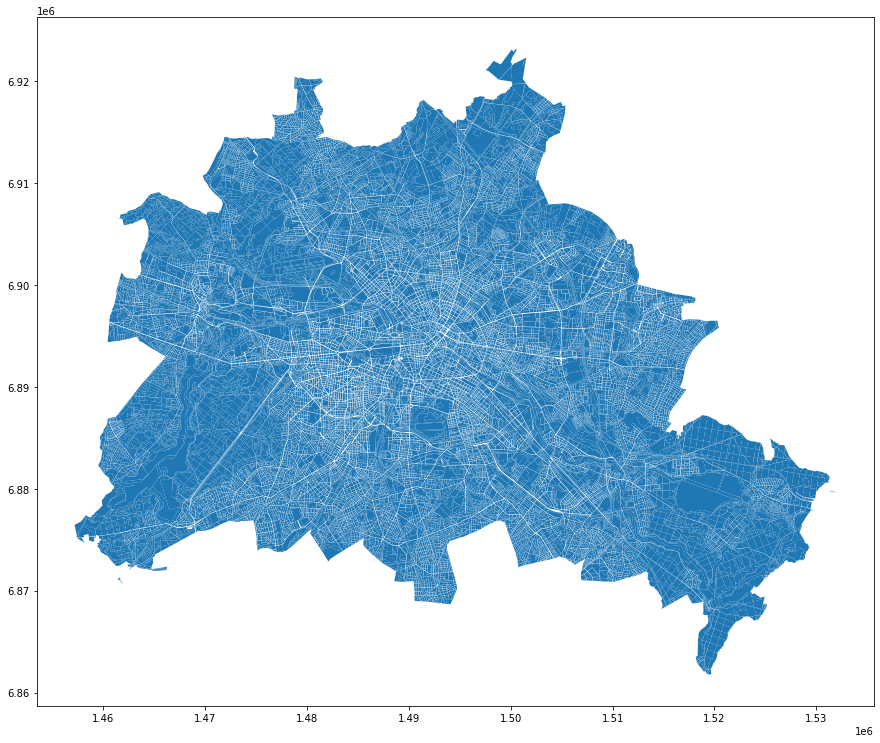

In [13]:
shape3.plot(figsize=[15,15])